[View in Colaboratory](https://colab.research.google.com/github/AndreaFrancis/Pet/blob/master/Taxi.ipynb)

In [0]:
#Importando las dependencias de Google Drive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [0]:
# Dependencias para los datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
import xgboost as xgb

%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams['axes.unicode_minus'] = False


In [0]:
# Autenticar
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# Leer datos de entranamiento y prueba
train_drive = drive.CreateFile({'id': '1UzauSLR8olyrcPnuMS2cFrighHuEiKqR'})
train_drive.GetContentFile('train.csv')
df_train = pd.read_csv('train.csv')

test_drive = drive.CreateFile({'id': '1i_MPuYG7xlZDyEHVbFccxEeRrHpiZzNx'})
test_drive.GetContentFile('test.csv')
df_test = pd.read_csv('test.csv')

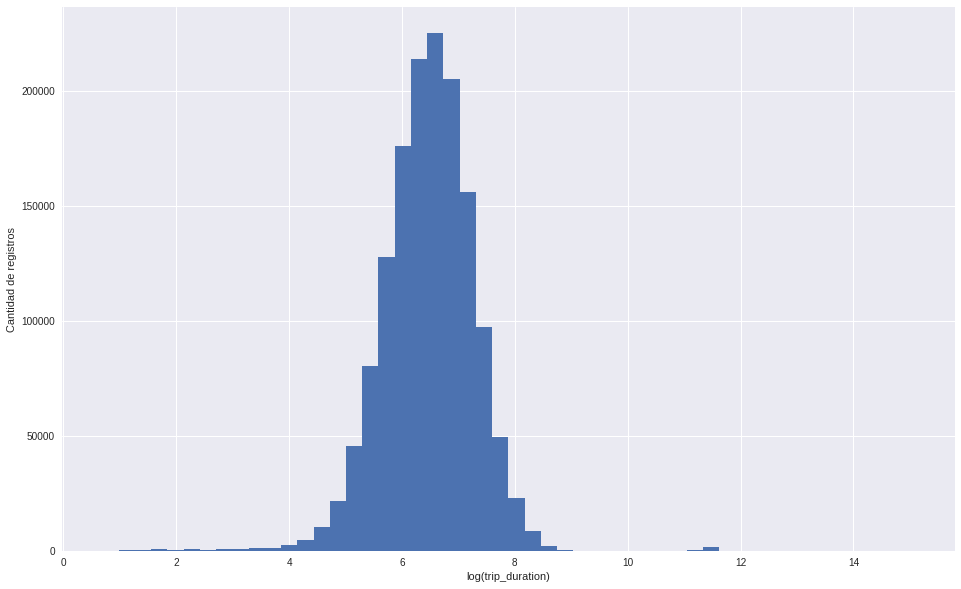

In [9]:
# Preparacion de los datos

## Promedio de la duracion 
df_train['log_trip_duration'] = np.log(df_train['trip_duration'].values + 1)
plt.hist(df_train['log_trip_duration'].values, bins = 50)
plt.xlabel('log(trip_duration)')
plt.ylabel('Cantidad de registros')
plt.show()

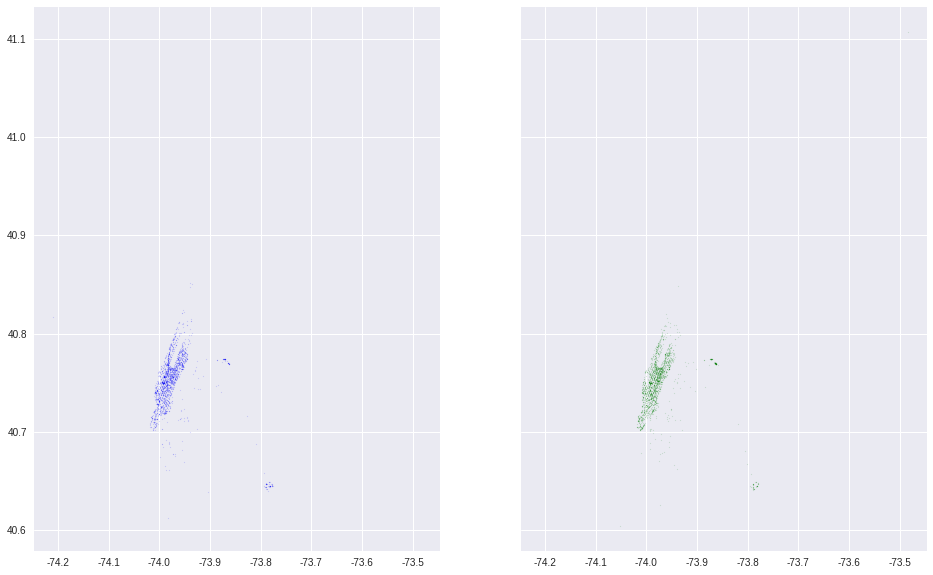

In [15]:
N = 2000
city_log_border = (-75, -75)
city_lat_border = (40, 40)
fig, ax = plt.subplots(ncols = 2, sharex = True, sharey = True)

ax[0].scatter(df_train['pickup_longitude'].values[:N],
              df_train['pickup_latitude'].values[:N],
              color= 'blue', s=1, label ='train', alpha =0.1)

ax[1].scatter(df_test['pickup_longitude'].values[:N],
              df_test['pickup_latitude'].values[:N],
              color= 'green', s=1, label ='test', alpha =0.1)
plt.show()

In [0]:
# Obteniendo los datasets
feature_names = list(df_train.columns)
y = np.log(df_train['trip_duration'].values + 1)

Xtr, Xtv, ytr, ytv = train_test_split(df_train[feature_names].values, y, test_size = 0.2, random_state = 1987)


In [0]:
# Implementar en:
# XGBoost - Danny, Random Forest - Fer, Regresion - Jhonny, KNN - Andrea , Regresion - Todos
